<a href="https://colab.research.google.com/github/PazSheimy/TessProposalTool-testcode/blob/main/Retrieve_TESS_Data_Validation_using_Astroquery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Retrieve TESS Data Validation Products with Astroquery
https://github.com/spacetelescope/notebooks/blob/master/notebooks/MAST/TESS/beginner_astroquery_dv/beginner_astroquery_dv.ipynb
documentation here: https://outerspace.stsci.edu/display/TESS

In [15]:
pip install astroplan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 KB 12.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for astroplan: filename=astroplan-0.8-py3-none-any.whl size=83275 sha256=b8cefdee4948ea13bb6f22e92142b02eb99a772a423f008c5001688e481db2c3
  Stored in directory: /root/.cache/pip/wheels/cd/87/42/4cf5673b77f4570603bcbdf176c0b313b8ad8e9b83b23039cc
Successfully built astroplan


In [1]:
pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 51.2 MB/s eta 0:00:00


In [4]:
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astropy.io import fits
from astropy import table
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

In [5]:
star_name = "L98-59"

# This query returns all obserations across all missions centered on our target.
observations = Observations.query_object(star_name, radius = "0 deg")
# Create a filter that will only pick out the observations we want: TESS timeseries missions from Sectors 13 and
# below.
obs_wanted = ((observations['dataproduct_type'] == 'timeseries') &
              (observations['obs_collection'] == 'TESS') &
             (observations['sequence_number'] <= 13))
# Print out a few columns to show what we have selected. Note that TESS multi-Sector observations are assigned
# a sequence_number based on the last Sector used in the range.
print(observations[obs_wanted]['obs_collection', 'project', 'obs_id', 'sequence_number'])

obs_collection project ... sequence_number
-------------- ------- ... ---------------
          TESS    TESS ...               6
          TESS    TESS ...               9
          TESS    TESS ...              13
          TESS    TESS ...               2
          TESS    TESS ...               5
          TESS    TESS ...               8
          TESS    TESS ...               9
          TESS    TESS ...              10
          TESS    TESS ...              11
          TESS    TESS ...              12


In [11]:
print(observations.keys())

['intentType', 'obs_collection', 'provenance_name', 'instrument_name', 'project', 'filters', 'wavelength_region', 'target_name', 'target_classification', 'obs_id', 's_ra', 's_dec', 'dataproduct_type', 'proposal_pi', 'calib_level', 't_min', 't_max', 't_exptime', 'em_min', 'em_max', 'obs_title', 't_obs_release', 'proposal_id', 'proposal_type', 'sequence_number', 's_region', 'jpegURL', 'dataURL', 'dataRights', 'mtFlag', 'srcDen', 'obsid', 'distance']


In [12]:

#this will let us know if the target was observed
if len(observations) == 0:
    print("Object not observed or not found in the database.")
else:
    print("Object was observed.")

Object was observed.


In [13]:

#this will let us know what camara
if 'camera' in observations.keys():
    camera = observations['camera']
    print("Object was observed with camera: ", camera)
else:
    print("Camera information not available in this catalog.")

Camera information not available in this catalog.


In [17]:
from astroplan import Observer,FixedTarget
from astropy.coordinates import SkyCoord
from astroquery.mast import Tesscut
from astropy import units as u


# define the coordinates of the target
coord = SkyCoord("101.2950 -16.6994", unit = "deg")

# get the sectors that intersect with the search area
sectors = Tesscut.get_sectors(coordinates=coord, radius=1*u.deg)

print(sectors)

  sectorName   sector camera ccd
-------------- ------ ------ ---
tess-s0006-2-3      6      2   3
tess-s0007-2-4      7      2   4
tess-s0033-2-3     33      2   3


In [22]:
data_products = Observations.get_product_list(observations[obs_wanted])
products_wanted = Observations.filter_products(data_products, 
                                    productSubGroupDescription=["DVT","DVM","DVS","DVR"])

print(products_wanted["productFilename"])
manifest = Observations.download_products(products_wanted)

                        productFilename                        
---------------------------------------------------------------
   tess2018206190142-s0001-s0006-0000000307210830-00196_dvr.pdf
   tess2018206190142-s0001-s0006-0000000307210830-00196_dvr.xml
   tess2019114105919-s0001-s0006-0000000307210830-00196_dvm.pdf
tess2018206190142-s0001-s0006-0000000307210830-01-00196_dvs.pdf
tess2018206190142-s0001-s0006-0000000307210830-02-00196_dvs.pdf
tess2018206190142-s0001-s0006-0000000307210830-03-00196_dvs.pdf
  tess2018206190142-s0001-s0006-0000000307210830-00196_dvt.fits
   tess2018206190142-s0001-s0009-0000000307210830-00205_dvr.pdf
   tess2018206190142-s0001-s0009-0000000307210830-00205_dvr.xml
   tess2019135213217-s0001-s0009-0000000307210830-00205_dvm.pdf
                                                            ...
   tess2019141104532-s0012-s0012-0000000307210830-00437_dvr.xml
   tess2019141104532-s0012-s0012-0000000307210830-00219_dvm.pdf
   tess2019141104532-s0012-s0012-0000000

In [23]:
print( manifest['Local Path'] )

                                                             Local Path                                                            
-----------------------------------------------------------------------------------------------------------------------------------
    ./mastDownload/TESS/tess2018206190142-s0001-s0006-0000000307210830/tess2018206190142-s0001-s0006-0000000307210830-00196_dvr.pdf
    ./mastDownload/TESS/tess2018206190142-s0001-s0006-0000000307210830/tess2018206190142-s0001-s0006-0000000307210830-00196_dvr.xml
    ./mastDownload/TESS/tess2018206190142-s0001-s0006-0000000307210830/tess2019114105919-s0001-s0006-0000000307210830-00196_dvm.pdf
 ./mastDownload/TESS/tess2018206190142-s0001-s0006-0000000307210830/tess2018206190142-s0001-s0006-0000000307210830-01-00196_dvs.pdf
 ./mastDownload/TESS/tess2018206190142-s0001-s0006-0000000307210830/tess2018206190142-s0001-s0006-0000000307210830-02-00196_dvs.pdf
 ./mastDownload/TESS/tess2018206190142-s0001-s0006-0000000307210830/tess2018

In [24]:
def parse_manifest(manifest):
    """
    Parse manifest and add back columns that are useful for TESS DV exploration.
    """
    results = deepcopy(manifest)
    filenames = []
    sector_range = []
    exts = []
    for i,f in enumerate(manifest['Local Path']):
        file_parts = np.array(np.unique(f.split(sep = '-')))
        sectors = list( map ( lambda x: x[0:2] == 's0', file_parts))
        s1 = file_parts[sectors][0]
        try:
            s2 = file_parts[sectors][1]
        except:
            s2 = s1
        sector_range.append("%s-%s" % (s1,s2))
        path_parts = np.array(f.split(sep = '/'))
        filenames.append(path_parts[-1])
        exts.append(path_parts[-1][-8:])

    results.add_column(table.Column(name = "filename", data = filenames))
    results.add_column(table.Column(name = "sectors", data = sector_range))
    results.add_column(table.Column(name = "fileType", data = exts))
    results.add_column(table.Column(name = "index", data = np.arange(0,len(manifest))))
    
    return results

#Run parser and print
results = parse_manifest(manifest)
print(results['index','sectors','fileType'])

index   sectors   fileType
----- ----------- --------
    0 s0001-s0006 _dvr.pdf
    1 s0001-s0006 _dvr.xml
    2 s0001-s0006 _dvm.pdf
    3 s0001-s0006 _dvs.pdf
    4 s0001-s0006 _dvs.pdf
    5 s0001-s0006 _dvs.pdf
    6 s0001-s0006 dvt.fits
    7 s0001-s0009 _dvr.pdf
    8 s0001-s0009 _dvr.xml
    9 s0001-s0009 _dvm.pdf
  ...         ...      ...
  104 s0012-s0012 _dvr.xml
  105 s0012-s0012 _dvm.pdf
  106 s0012-s0012 _dvm.pdf
  107 s0012-s0012 _dvs.pdf
  108 s0012-s0012 _dvs.pdf
  109 s0012-s0012 _dvs.pdf
  110 s0012-s0012 _dvs.pdf
  111 s0012-s0012 _dvs.pdf
  112 s0012-s0012 _dvs.pdf
  113 s0012-s0012 dvt.fits
  114 s0012-s0012 dvt.fits
Length = 115 rows


In [25]:
print(results['index', 'sectors', 'fileType'][results['sectors'] == "s0001-s0013"])

index   sectors   fileType
----- ----------- --------
   14 s0001-s0013 _dvr.pdf
   15 s0001-s0013 _dvr.xml
   16 s0001-s0013 _dvm.pdf
   17 s0001-s0013 _dvs.pdf
   18 s0001-s0013 _dvs.pdf
   19 s0001-s0013 _dvs.pdf
   20 s0001-s0013 dvt.fits


In [26]:
# Locate the file that has the data
want = (results['sectors'] == "s0001-s0013") & (results['fileType'] == "dvt.fits")
dvt_filename = manifest[want]['Local Path'][0]

# Print out the file info
fits.info(dvt_filename)

Filename: ./mastDownload/TESS/tess2018206190142-s0001-s0013-0000000307210830/tess2018206190142-s0001-s0013-0000000307210830-00226_dvt.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   ()      
  1  TCE_1         1 BinTableHDU     92   236344R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  2  TCE_2         1 BinTableHDU     92   236344R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  3  TCE_3         1 BinTableHDU     92   236344R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  4  Statistics    1 BinTableHDU    157   236344R x 38C   [D, E, J, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


Text(0.5, 1.0, 'Data Validation Detrended Light Curve for L98-59')

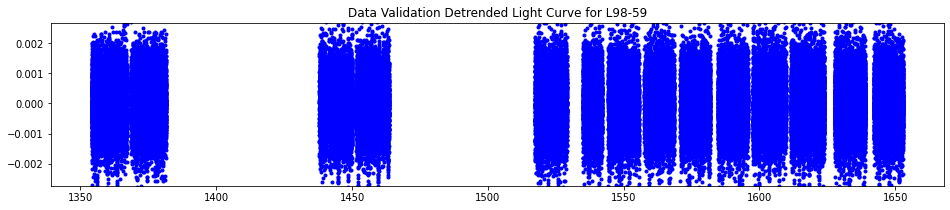

In [27]:
# Plot the detrended photometric time series in the first binary table. 
data = fits.getdata(dvt_filename, 1)
time = data['TIME']
relflux = data['LC_DETREND']

plt.figure(figsize = (16,3))
plt.plot (time, relflux, 'b.')
plt.ylim(1.2* np.nanpercentile(relflux, .5) , 1.2 * np.nanpercentile(relflux, 99.5))
plt.title('Data Validation Detrended Light Curve for %s' % (star_name))

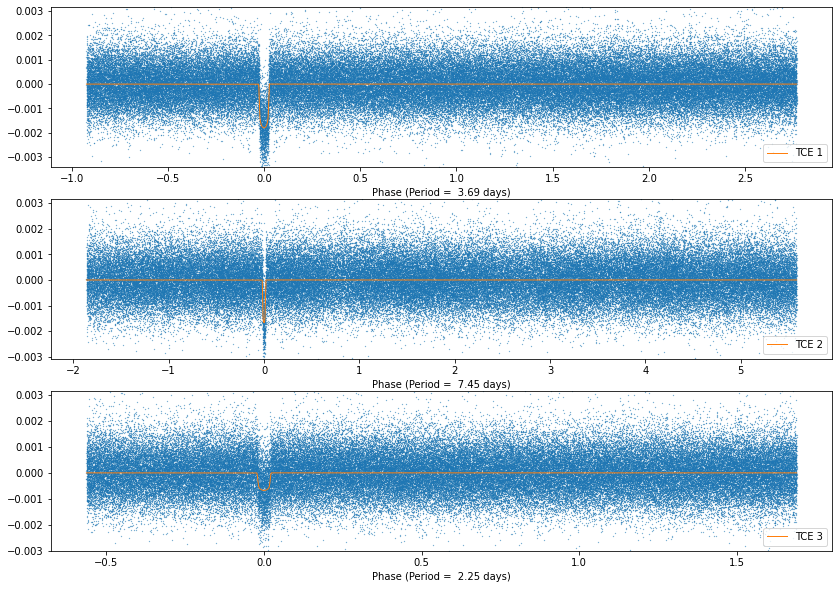

In [28]:
def plot_folded(phase, data, model, ext, period):
    isort = phase.argsort()
    
    plt.plot(phase[isort], data[isort], '.', ms = .5)
    plt.plot(phase[isort], model[isort], '-', lw = 1, label = "TCE %i" % ext)
    plt.xlabel('Phase (Period = %5.2f days)' % period)
    plt.ylim(1.5 * np.nanpercentile(data, .5) , 1.4 * np.nanpercentile(data,99.5))
    plt.legend(loc = "lower right")

plt.figure(figsize = (14,10))

nTCEs = fits.getheader(dvt_filename)['NEXTEND'] - 2

for ext in range(1, nTCEs + 1):
    data = fits.getdata(dvt_filename, ext)
    head = fits.getheader(dvt_filename, ext)
    period = head['TPERIOD']
    phase = data['PHASE']
    flux = data['LC_INIT']
    model = data['MODEL_INIT']
    plt.subplot(3, 1, ext)
    plot_folded(phase, flux, model, ext, period)